# Heart Disease Analysis

# [Table of contents](#Table-of-contents)

+ <a href = '#1.-Introduction'>1. Introduction</a>
+ <a href = '#2.-Data-observing'>2. Data observing</a>
+ <a href = '#3.-Exploratory-Data-Analysis'>3. Exploratory Data Analysis</a>
+ <a href = '#4.-Data-preprocessing-&-Feature-Engineering'>4. Data preprocessing & Feature Engineering</a>
+ <a href = '#5.-Model-selection'>5. Model selection</a>
+ <a href = '#6.-Model-evaluation'>6. Model evaluation</a>

# [1. Introduction](#Table-of-contents)

<img src = 'https://2f4izj3opteu3l5obc1sh0bb-wpengine.netdna-ssl.com/wp-content/uploads/sites/14/2016/09/heartbeat-heart-attack.jpg'>


Heart disease is the leading cause of death in the United States. The term “heart disease” refers to several types of heart conditions. In the United States, the most common type of heart disease is coronary artery disease (CAD), which can lead to heart attack.

This dataset is taken from <a href = 'https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease'>kaggle</a> and contains data from <a href = 'https://www.cdc.gov/heartdisease/risk_factors.htm'>CDC</a> that conducted surveys in order to collect data of US citizens' health state. Originaly this dataset had 280 columns that looked like basic questions, but author of this kaggle dataset decided to clean CDC data and upload it, so that people could practice in ML and analysis in general.

Considering all of that, I will use this data to dive into heart disease and its connections with people's trait or other diseases. After this I will try to create a Machine Learning model to predict the probability of heart disease depending on some features from this data.

### Data description

* HeartDisease - Categorical feature, which will be used as target feature or y in machine learning model creation

* BMI - Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. <img src = 'http://travelingandliving.com/wp-content/uploads/2020/09/BMI.png'>

* Smoking - Categorical feature, which represent answer to question "Do you smoke?"

* AlcoholDrinking - Categorical feature, which represent answer to question "Do you drink alcohol?"

* Stroke - Categorical feature which represents answer to question "Have you had a stroke?"

* PhysicalHealth - Numeric evaluation of physical health from 0 to 30

* MentalHealth - Numeric evaluation of mental health from 0 to 30

* DiffWalking - inability to walk properly due to abnormal and uncontrollable walking patterns

* Sex - gender

* AgeCategory - categories of ages, split by 5 years from 18 till 80

* Race - name speaks for itself

* Diabetic - categorical feature, which represents answer to question 'Do you have diabetes?'

* PhysicalActivity - categorical feature, which represents answer to question 'Do you do sports?'

* GenHealth - cateogrical feature, which evaluates general health of patient by 5 groups: 'Excellent', 'Fair', 'Good', 'Poor', 'Very good'

* SleepTime - sleep time in hours

* Asthma - categorical feature, representing Asthma illness

* KidneyDisease - tells if patient has a kidney disease or not

* SkinCancer - tells if patient has a skin cancer or not

# [2. Data observing](#Table-of-contents)

In [1]:
#import models to work with
import pandas as pd
import matplotlib.pyplot as plt

#setting parameters to plots
plt.rc('font', size = 16)
plt.rc('legend', fontsize = 16)
plt.rc('figure', figsize = (16, 9))
plt.style.use('dark_background')

In [2]:
#read data
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# check size of dataset and null values
print(f'(Rows, Columns): {df.shape}\n')
print('Number of null values in each column: ')
df.isna().sum()

(Rows, Columns): (319795, 18)

Number of null values in each column: 


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df2 = df.copy()

# turn categorical feature into numeric one by taking first age in each category
df2['AgeCategory'] = df2['AgeCategory'].apply(lambda x: x[:2]).astype(int)

#basic stats of numerical features
df2.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Reds')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,52.440945,18.069747,18.000000,40.000000,55.000000,65.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


We can see that we have about 300,000 records of patient and neither of records has null values, so we don't have to deal with handling nulls.

Now let's look how balanced our dataset is:

In [5]:
cat_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in cat_cols:
    cat_ans = df[i].value_counts()
    pos_vals = cat_ans[1]/(cat_ans[0]+cat_ans[1]) * 100
    if i == 'Sex':
        print(f'Males: {round(pos_vals, 2)}%')
    else:
        print(f'Positive values of {i}: {round(pos_vals, 2)}%')
    print('-'*10)

Positive values of Smoking: 41.25%
----------
Positive values of AlcoholDrinking: 6.81%
----------
Positive values of Stroke: 3.77%
----------
Positive values of DiffWalking: 13.89%
----------
Males: 47.53%
----------
Positive values of Asthma: 13.41%
----------
Positive values of KidneyDisease: 3.68%
----------
Positive values of SkinCancer: 9.32%
----------


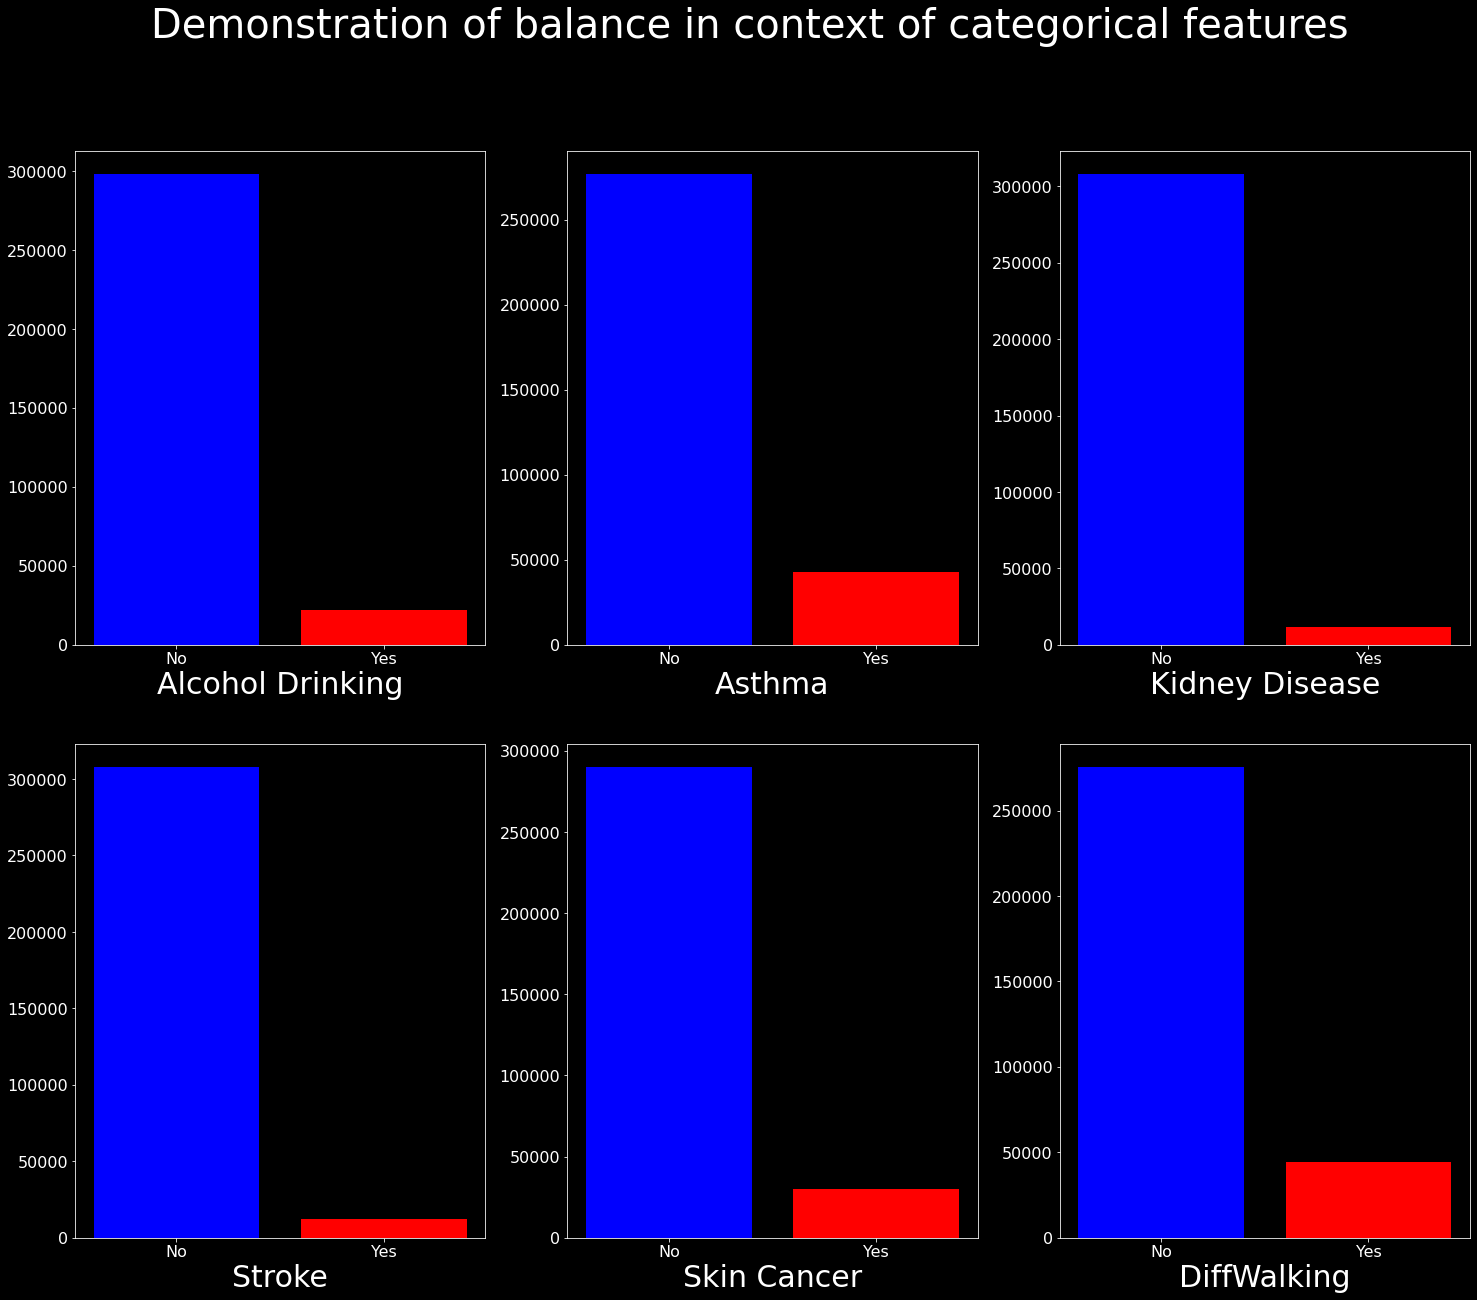

In [6]:
fig, axs = plt.subplots(2, 3, figsize = (25, 20))
c = ['blue', 'red']
axs[0][0].bar(df2['AlcoholDrinking'].value_counts().index, df2['AlcoholDrinking'].value_counts(), color = c)
axs[0][0].set_xlabel('Alcohol Drinking', fontsize = 30)

axs[1][0].bar(df2['Stroke'].value_counts().index, df2['Stroke'].value_counts(), color = c)
axs[1][0].set_xlabel('Stroke', fontsize = 30)

axs[0][1].bar(df2['Asthma'].value_counts().index, df2['Asthma'].value_counts(), color = c)
axs[0][1].set_xlabel('Asthma', fontsize = 30)

axs[0][2].bar(df2['KidneyDisease'].value_counts().index, df2['KidneyDisease'].value_counts(), color = c)
axs[0][2].set_xlabel('Kidney Disease', fontsize = 30)

axs[1][1].bar(df2['SkinCancer'].value_counts().index, df2['SkinCancer'].value_counts(), color = c)
axs[1][1].set_xlabel('Skin Cancer', fontsize = 30)

axs[1][2].bar(df2['DiffWalking'].value_counts().index, df2['DiffWalking'].value_counts(), color = c)
axs[1][2].set_xlabel('DiffWalking', fontsize = 30)

plt.suptitle('Demonstration of balance in context of categorical features', fontsize = 40)
plt.show()

This scope of charts shows that we have pretty imbalanced data when it comes to categorical features. Almost all of them(except Smoking and Sex) has difference in values frequency of 85% in minimum

# [3. Exploratory Data Analysis](#Table-of-contents)

This part of analysis will help us understand data and connections between features as well as generate insights in them. In the scopes of EDA several questions will be considered:
* <a href = '#3.1-Does-BMI-affect-heart-disease-probability?'>3.1 Does BMI affect heart disease probability?</a>
* <a href = '#3.2-How-does-age-affect-different-disease-frequencies?'>3.2 How does age affect different disease frequencies?</a>
* <a href = '#3.3-Connection-between-smoking-and-diseases'>3.3 Connection between smoking and asthma</a>
* <a href = '#3.4-Affect-of-sleep-time-on-health'>3.4 Affect of sleep time on health</a>

## [3.1 Does BMI affect heart disease probability?](#3.-Exploratory-Data-Analysis)

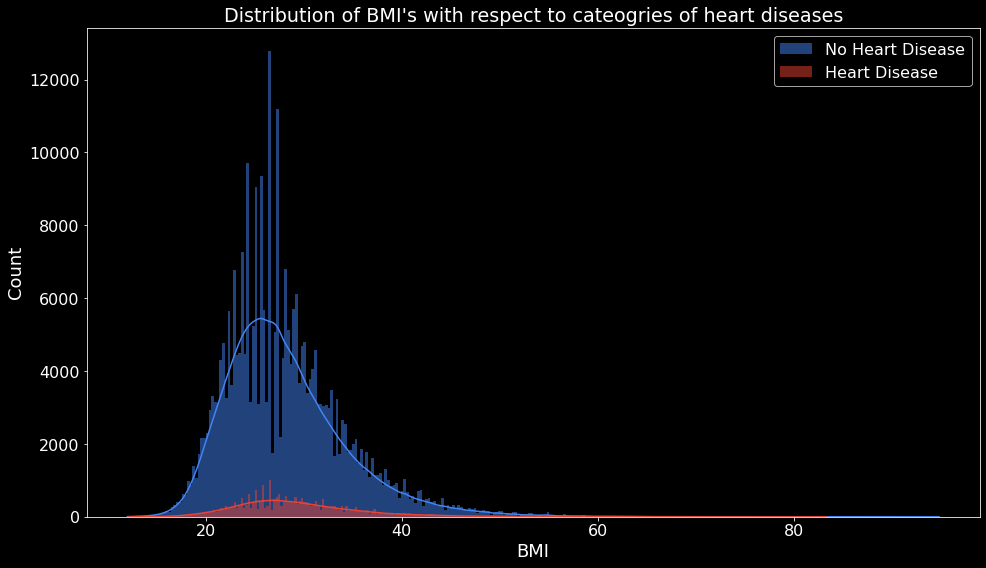

In [7]:
import numpy as np
from scipy import stats
from ipywidgets import interact

red = "#ea4335"
blue = "#4285f4"

kde1 = stats.gaussian_kde(df2[df2['HeartDisease']=='Yes']['BMI'])
xx1 = np.linspace(np.min(df2[df2['HeartDisease']=='Yes']['BMI']), np.max(df2[df2['HeartDisease']=='Yes']['BMI']), 1000)
yy1 = kde1(xx1)*6e3

kde2 = stats.gaussian_kde(df2[df2['HeartDisease']=='No']['BMI'])
xx2 = np.linspace(np.min(df2[df2['HeartDisease']=='No']['BMI']), np.max(df2[df2['HeartDisease']=='No']['BMI']), 1000)
yy2 = kde2(xx2)*7e4

plt.hist(df2[df2['HeartDisease']=='No']['BMI'], bins = 300, color=blue, label = 'No Heart Disease', alpha = 0.5)
plt.plot(xx2, yy2, linewidth = 1.5, color = blue)
plt.hist(df2[df2['HeartDisease']=='Yes']['BMI'], bins = 300, color=red, label = 'Heart Disease', alpha = 0.5)
plt.plot(xx1, yy1, linewidth = 1.5, color = red)


plt.xlabel('BMI', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title("Distribution of BMI's with respect to cateogries of heart diseases")
plt.legend(fontsize = 16, loc = 'upper right')
plt.show()

In [8]:
def plot_boxplot(data):
    boxplot_labels = ['Heart Disease', 'No Heart Disease']
    bplot = plt.boxplot(data, vert=False, patch_artist=True, notch = True, labels = boxplot_labels)
    boxplot_color = [red, blue]
    for patch, color in zip(bplot['boxes'], boxplot_color):
            patch.set_facecolor(color)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xlabel('BMI')
    plt.title("BMI's with respect to cateogries of heart diseases")
    plt.show()

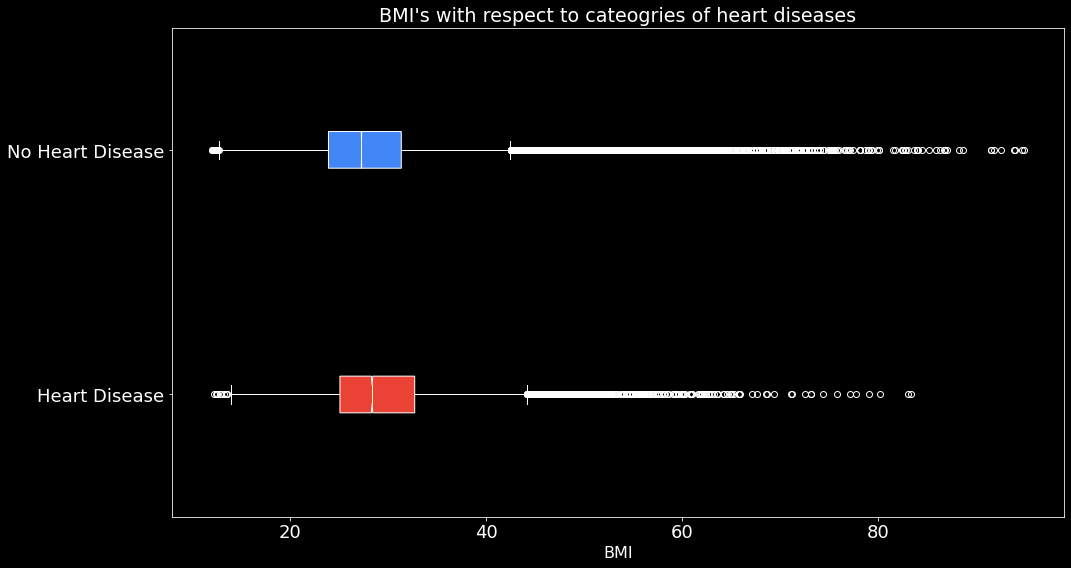

In [9]:
boxplot_data = [df2[df2['HeartDisease']=='Yes']['BMI'], df2[df2['HeartDisease']=='No']['BMI']]
plot_boxplot(boxplot_data)

Let's remove outliers by IQR rule:


$$ IQR = Q3 - Q1 $$

$$ LowerBorder = Q1 - (1.5 * IQR) $$

$$ Higher Border = Q3 + (1.5 * IQR) $$


In [10]:
def remove_outlier(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - (1.5*iqr)
    higher = q3 + (1.5*iqr)
    return [x for x in data if lower <= x <= higher]

boxplot_data2 = []
for i in boxplot_data:
    boxplot_data2.append(remove_outlier(i))

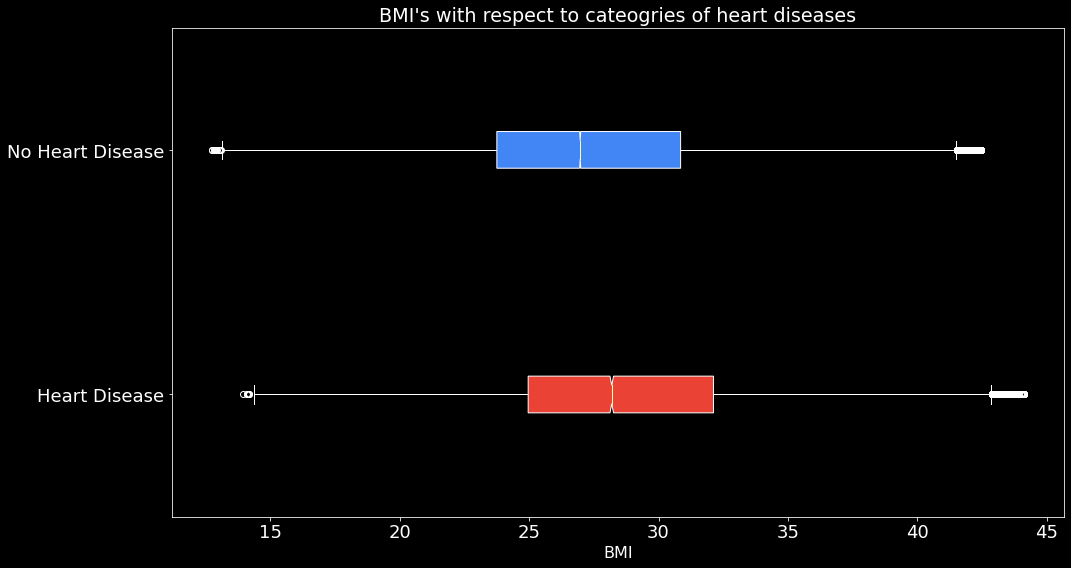

In [11]:
plot_boxplot(boxplot_data2)

Observing this plots we can see that people with higher BMI are more likely to get heart disease than others

## [3.2 How does age affect different disease frequencies?](#3.-Exploratory-Data-Analysis)

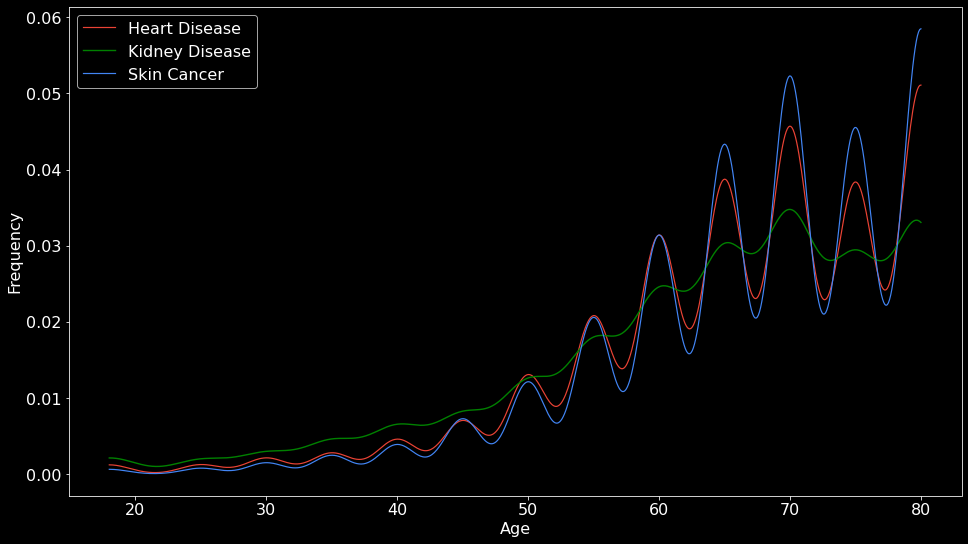

In [12]:
# count kde's
xx_h = np.linspace(np.min(df2[df2["HeartDisease"]=='Yes']["AgeCategory"]), 
                   np.max(df2[df2["HeartDisease"]=='Yes']["AgeCategory"]), 700)
xx_k = np.linspace(np.min(df2[df2["KidneyDisease"]=='Yes']["AgeCategory"]), 
                   np.max(df2[df2["KidneyDisease"]=='Yes']["AgeCategory"]), 700)
xx_s = np.linspace(np.min(df2[df2["SkinCancer"]=='Yes']["AgeCategory"]), 
                   np.max(df2[df2["SkinCancer"]=='Yes']["AgeCategory"]), 700)

kde_h = stats.gaussian_kde(df2[df2["HeartDisease"]=='Yes']["AgeCategory"])
kde_k = stats.gaussian_kde(df2[df2["KidneyDisease"]=='Yes']["AgeCategory"])
kde_s = stats.gaussian_kde(df2[df2["SkinCancer"]=='Yes']["AgeCategory"])

yy_h = kde_h(xx_h)
yy_k = kde_k(xx_k)
yy_s = kde_s(xx_s)

# plot received results
plt.plot(xx_h, yy_h, label = 'Heart Disease', color = red, linewidth = 1.2)
plt.plot(xx_k, yy_k, label = 'Kidney Disease', color = 'green', linewidth = 1.4)
plt.plot(xx_s, yy_s, label = 'Skin Cancer', color = blue, linewidth = 1.2)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see that older people are tend to have more serious diseases and the number this probability increases faster with age

## [3.3 Connection between smoking and diseases](#3.-Exploratory-Data-Analysis)

In [13]:
def smoke_plot(feature):
    df_smoke = df2[['Smoking', feature]]
    
    is_smk = probability_df(feature)[f'Has {feature}'][0]
    isnt_smk = probability_df(feature)[f"Doesn't have {feature}"][0]
    fig, ax = plt.subplots(1, 2, sharey = True)
    
    ax[0].bar(f'Has {feature}', df_smoke[df_smoke[feature]=='Yes'][feature].value_counts(), color = blue)
    ax[0].bar(f'Has {feature}', df_smoke[(df_smoke[feature] == 'Yes') & (df_smoke['Smoking']=='Yes')].value_counts(), color = red)
    ax[0].text(x = 1e-3, y = 5, s = f'{round(is_smk, 2)}%', fontsize = 20)
    
    ax[1].bar(f'Does not have {feature}', df_smoke[(df_smoke[feature] == 'No')][feature].value_counts(), color = blue)
    ax[1].bar(f'Does not have {feature}', df_smoke[(df_smoke[feature] == 'No') & (df_smoke['Smoking']=='Yes')].value_counts(), color = red, label = 'Does smoke')
    ax[1].text(x = 1e-8, y = 1.5e5, s = f'{round(isnt_smk, 2)}%', fontsize = 20)
    
    plt.suptitle(f'Comparison of people with {feature.lower()} and smokers')
    
    handles, labels = ax[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.show()
    
def probability_df(feature):
    df_smoke = df2[['Smoking', feature]]
    
    is_smk = df_smoke[(df_smoke[feature] == 'Yes') & (df_smoke['Smoking']=='Yes')]['Smoking'].value_counts()[0]/df_smoke[df_smoke[feature]=='Yes'][feature].value_counts()[0]*100
    isnt_smk = df_smoke[(df_smoke[feature] == 'No') & (df_smoke['Smoking']=='Yes')]['Smoking'].value_counts()[0]/df_smoke[(df_smoke[feature] == 'No')][feature].value_counts()[0]*100
    
    smoke_freq = pd.DataFrame({f'Has {feature}': round(is_smk, 2), f"Doesn't have {feature}": round(isnt_smk, 2).ravel()}, index = ['Smokers frequency'])
    return smoke_freq

In [14]:
def smoke_interact(disease):
    smoke_plot(disease)
    return probability_df(disease).style.background_gradient(cmap = 'Blues')

interact(smoke_interact, disease = ['Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']);

interactive(children=(Dropdown(description='disease', options=('Stroke', 'Diabetic', 'Asthma', 'KidneyDisease'…

Thus, surprusingly we can see that smoking does not really affect getting asthma, however, it may cause flare-ups on people who already have asthma.

Smoking people are 20% more likely to have heart disease than non-smokers.

Stroke is 16% more likely to hit smokers

KidneyDisease is 10% more common between smokers than other people.

In [15]:
df2.groupby('Smoking').mean()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
Smoking,,,,,
No,28.202278,2.603240,3.330741,50.466876,7.133575
Yes,28.500768,4.466302,4.706879,55.252767,7.045084


Smokers in average have slightly higher Physical and Mental health

## [3.4 Affect of sleep time on health](#3.-Exploratory-Data-Analysis)

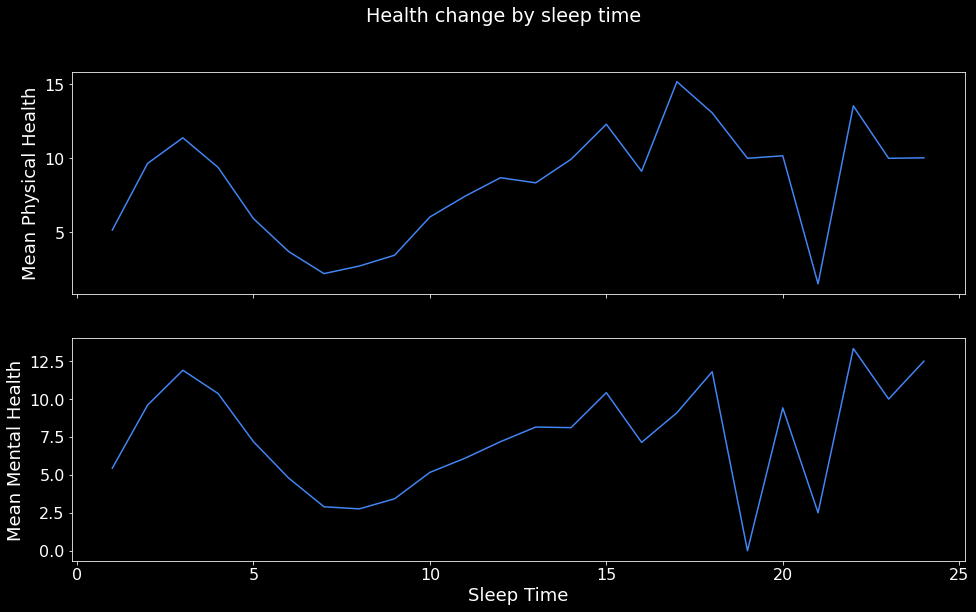

In [16]:
df3 = df2[['SleepTime', 'PhysicalHealth', 'MentalHealth']]
fig, ax = plt.subplots(2, 1, sharex = True)

ax[0].plot(df3.groupby('SleepTime').mean().index, df3.groupby('SleepTime').mean()['PhysicalHealth'], color=blue)
ax[0].set_ylabel('Mean Physical Health', fontsize = 18)

ax[1].plot(df3.groupby('SleepTime').mean().index, df3.groupby('SleepTime').mean()['MentalHealth'], color=blue)
ax[1].set_xlabel('Sleep Time', fontsize = 18)
ax[1].set_ylabel('Mean Mental Health', fontsize = 18)

plt.suptitle('Health change by sleep time')
plt.show()

We can see massive drops at both of mental and physical healths when sleep time equals 6-7 and 21 hours

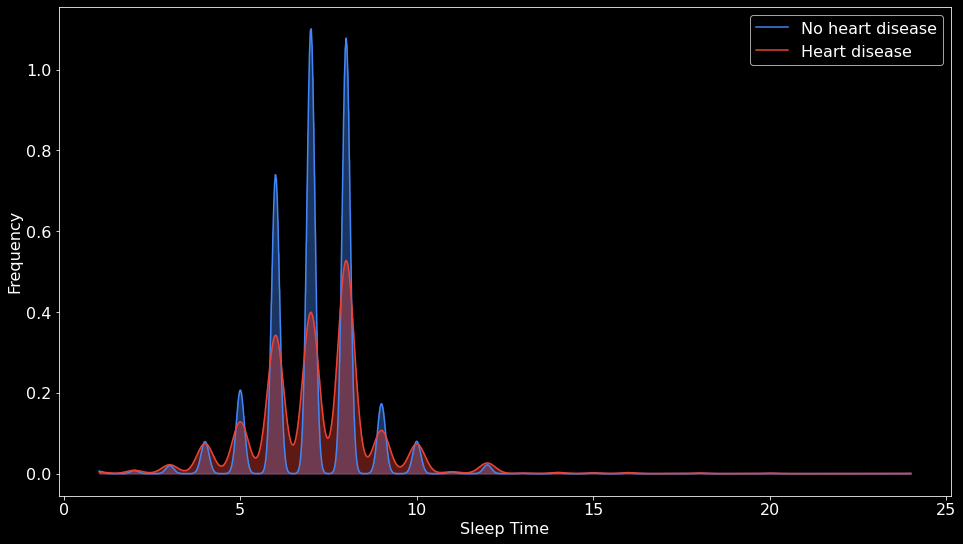

In [17]:
kde1 = stats.gaussian_kde(df2[df2["HeartDisease"]=='No']["SleepTime"])
kde2 = stats.gaussian_kde(df2[df2["HeartDisease"]=='Yes']["SleepTime"])

xx1 = np.linspace(np.min(df2[df2["HeartDisease"]=='No']["SleepTime"]),
                 np.max(df2[df2["HeartDisease"]=='No']["SleepTime"]), 1000)
xx2 = np.linspace(np.min(df2[df2["HeartDisease"]=='Yes']["SleepTime"]),
                 np.max(df2[df2["HeartDisease"]=='Yes']["SleepTime"]), 1000)
yy1 = kde1(xx1)
yy2 = kde2(xx2)

plt.fill_between(xx1, yy1, step = 'pre', alpha = .4, color = blue)
plt.fill_between(xx2, yy2, step = 'pre', alpha = .4, color = red)
plt.plot(xx1, yy1, color = blue, label = 'No heart disease')
plt.plot(xx2, yy2, color = red, label = 'Heart disease')
plt.xlabel('Sleep Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Sleep time doesn't actually affect heart disease.

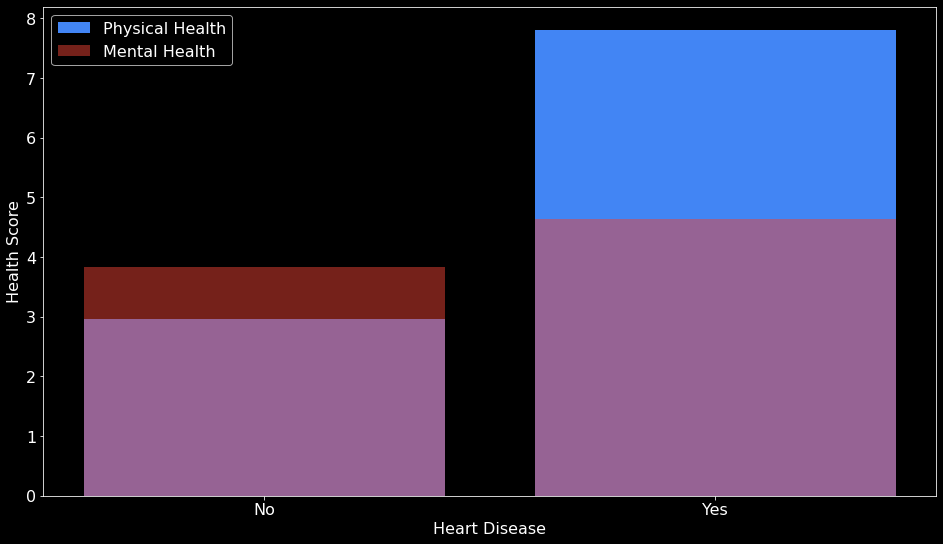

In [18]:
plt.bar(df2.groupby('HeartDisease').mean()['PhysicalHealth'].index, df2.groupby('HeartDisease').mean()['PhysicalHealth'], color = blue, label = 'Physical Health')
plt.bar(df2.groupby('HeartDisease').mean()['MentalHealth'].index, df2.groupby('HeartDisease').mean()['MentalHealth'], color = red, alpha = 0.5, label = 'Mental Health')
plt.xlabel('Heart Disease')
plt.ylabel('Health Score')
plt.legend()
plt.show()

People with mental problems have more chanses to have heart disease, than others. Also interesting is the insight is that people with heart disease feel themselves better physically than those

# [4. Data preprocessing & Feature Engineering](#Table-of-contents)

* <a href = '#4.1-Balancing-Data'>4.1 Balancing Data</a>
* <a href = '#4.2-Feature-correlation-&-Mutual-information'>4.2 Feature correlation & Mutual information</a>
* <a href = '#4.3-Data-standartization-&-normalization'>4.3 Data standartization & normalization</a>
* <a href = '#4.4-K-Means-clustering'>4.4 K-Means clustering</a>
* <a href = '#4.5-Principal-Component-Analysis'>4.5 Principal Component Analysis</a>

In [19]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_regression

## [4.1 Balancing Data](#4.-Data-preprocessing-&-Feature-Engineering)

Firstly let's encode all categorical variables into numeric ones to help our future model work with them

In [20]:
df_temp = df.copy()
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']
for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])

df_temp['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

We remember awful balance of our data, so we will fix it by using undersamplung method

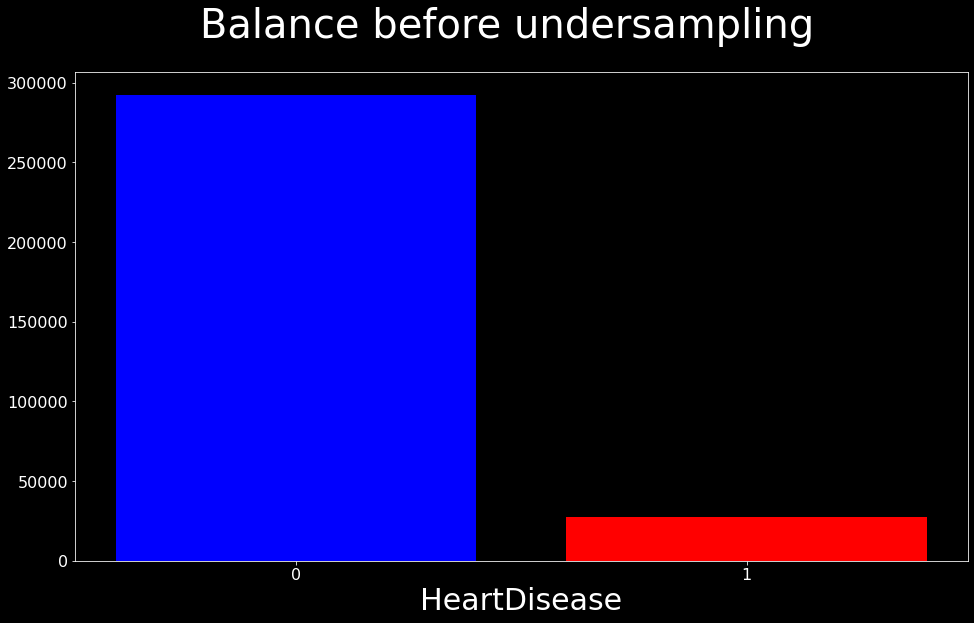

In [21]:
X = df_temp.copy()
y = X.pop('HeartDisease')
plt.bar(df_temp['HeartDisease'].value_counts().index, df['HeartDisease'].value_counts(), color = c)
plt.xlabel('HeartDisease', fontsize = 30)
plt.xticks(y.value_counts().index)
plt.suptitle('Balance before undersampling', fontsize = 40)
plt.show()

In [22]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)
y_rus.value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

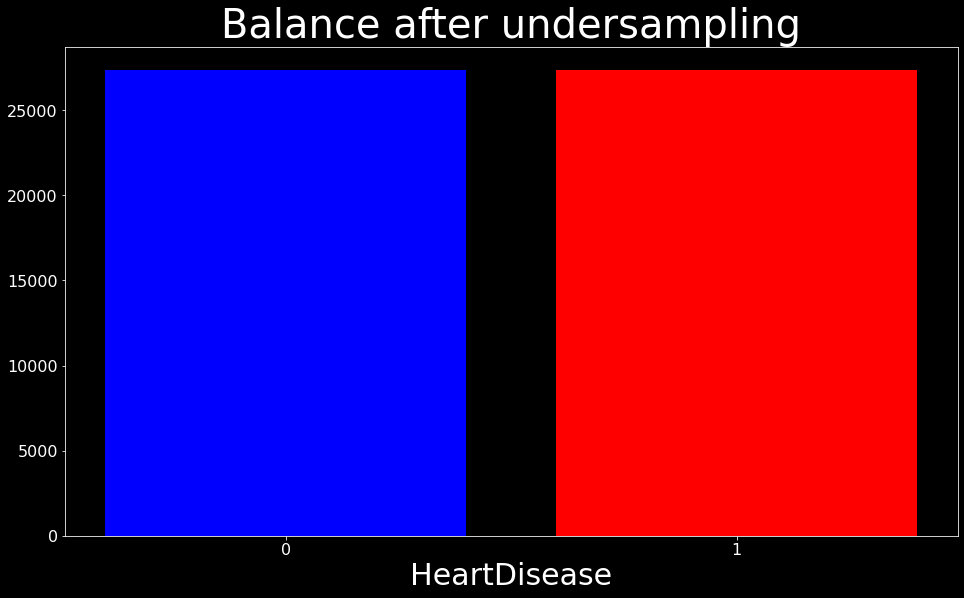

In [23]:
plt.bar(y_rus.value_counts().index, y_rus.value_counts(), color = c)
plt.xlabel('HeartDisease', fontsize = 30)
plt.xticks(y_rus.value_counts().index)
plt.title('Balance after undersampling', fontsize = 40)
plt.show()

## [4.2 Feature correlation & Mutual information](#4.-Data-preprocessing-&-Feature-Engineering)

Now, since data is balanced, we can freely calculate correlation between features

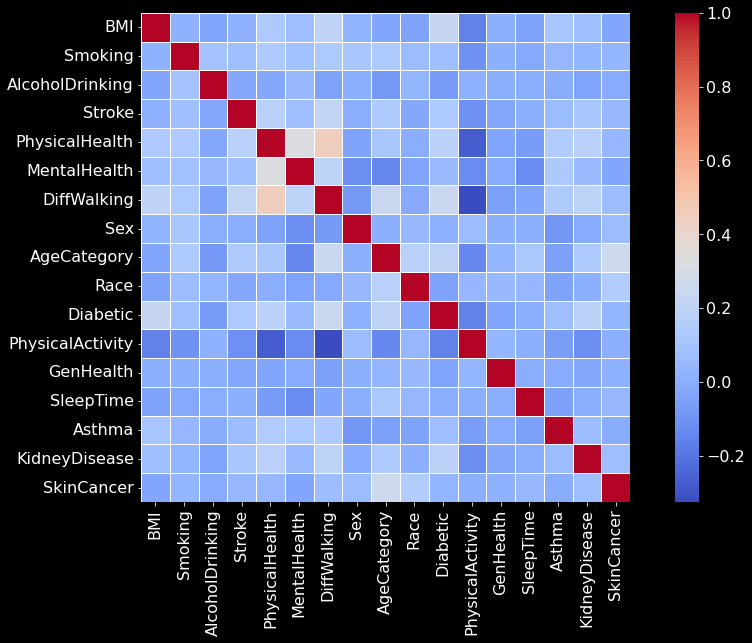

In [24]:
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(X_rus.corr(), cmap = 'coolwarm', square = True, linewidths=.5);
plt.show()

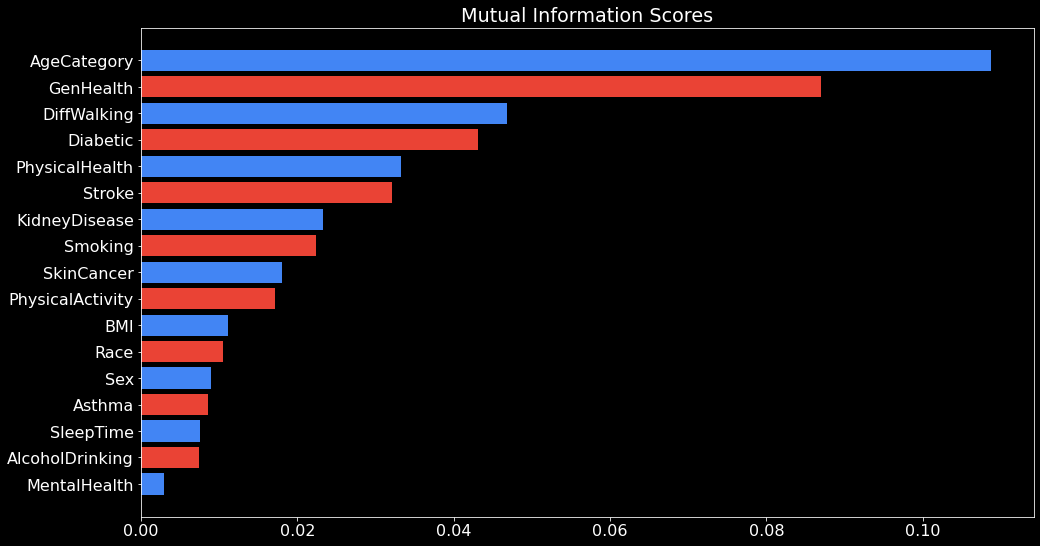

In [25]:
discrete_features = [pd.api.types.is_integer_dtype(t) for t in X_rus.dtypes]

mi_scores = mutual_info_regression(X_rus, y_rus, discrete_features=discrete_features)
mi_scores = {i[0]: i[1] for i in zip(list(X_rus.columns), list(mi_scores))}
mi_scores = dict(sorted(mi_scores.items(), key=lambda x:x[1]))

colors = [blue if (i+2)%2==0 else red for i,v in enumerate(mi_scores)]

mi_bar = np.arange(len(mi_scores.values()))
plt.barh(mi_bar, mi_scores.values(), color = colors)
plt.yticks(mi_bar, mi_scores.keys())
plt.title('Mutual Information Scores')
plt.show()

We can see that AgeCategory and General Health have relatively much more obvious connection between Heart Disease, however all of them have quite low mutual information score.

## [4.3 Data standartization & normalization](#4.-Data-preprocessing-&-Feature-Engineering)

Now let's standardize data to use in Principal Component Analysis


$$ X_{stand} = \frac{x - \mu}{\sigma} $$

In [26]:
X_std = (X_rus - X_rus.mean(axis=0)) / X_rus.std(axis=0)
X_std.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-0.351721,1.018352,4.079537,-0.322755,-0.539874,-0.496760,-0.565434,0.947934,-0.516301,0.463255,-0.563214,0.629317,-1.580874,-0.070637,-0.42964,-0.290147,-0.390725
1,-1.579823,-0.981960,-0.245121,-0.322755,-0.539874,-0.496760,-0.565434,-1.054906,-1.108253,-2.096861,-0.563214,0.629317,-0.134188,0.550584,-0.42964,-0.290147,-0.390725
2,-0.377884,-0.981960,-0.245121,-0.322755,1.570181,-0.496760,-0.565434,-1.054906,-1.108253,-1.243489,-0.563214,0.629317,-0.857531,-0.691859,-0.42964,-0.290147,-0.390725
3,0.383909,1.018352,-0.245121,-0.322755,-0.338916,-0.262625,-0.565434,-1.054906,0.371627,-2.096861,-0.563214,0.629317,-0.857531,-0.691859,-0.42964,-0.290147,-0.390725
4,1.199565,1.018352,-0.245121,-0.322755,-0.539874,-0.496760,-0.565434,0.947934,0.667603,0.463255,-0.563214,0.629317,-0.134188,-0.691859,-0.42964,-0.290147,-0.390725


In [27]:
X_rus_norm = Normalizer().fit_transform(X_rus)
X_rus_norm

array([[0.92773864, 0.03495624, 0.03495624, ..., 0.        , 0.        ,
        0.        ],
       [0.89144929, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76143404, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97018173, 0.02613636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93447377, 0.0281468 , 0.        , ..., 0.0281468 , 0.        ,
        0.        ],
       [0.90451303, 0.03299938, 0.        , ..., 0.03299938, 0.        ,
        0.        ]])

## [4.4 K-Means clustering](#4.-Data-preprocessing-&-Feature-Engineering)


First of all we must define the best number of clusters for K-Means

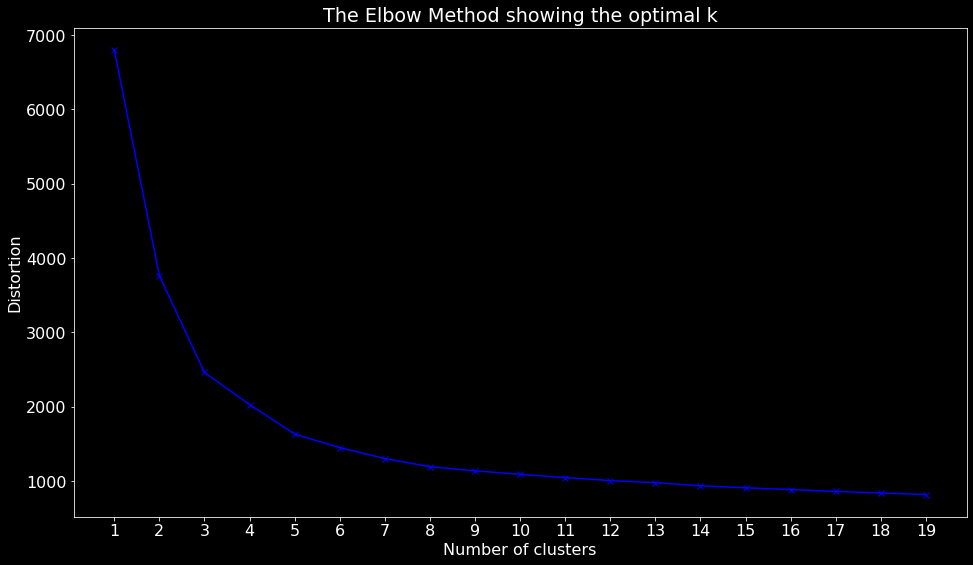

In [28]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

distortions = []
clusts = range(1, 20)
for i in clusts:
    kmeanModel = KMeans(n_clusters=i).fit(X_rus_norm)
    distortions.append(kmeanModel.inertia_)

plt.plot(clusts, distortions, 'bx-')
plt.xticks(clusts)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the result of elbow plot, it seems like the most optimal number of clusters is 5, so I will be using it.

In [29]:
kmeans = KMeans(n_clusters = 5, n_init = 100)
X_rus_clust = kmeans.fit_transform(X_rus_norm)
kmeans_labels = kmeans.labels_
X_rus_clust = pd.DataFrame(X_rus_clust, columns=[f"Centroid_{i}" for i in range(X_rus_clust.shape[1])])
X_rus_clust.head()

,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4
0,0.129884,0.807740,0.600820,0.163182,0.645972
1,0.195586,0.819114,0.614802,0.212480,0.661484
2,0.612339,0.533230,0.787183,0.640618,0.132384
3,0.165710,0.730580,0.549453,0.164310,0.587474
4,0.146992,0.805067,0.602631,0.144868,0.642082


In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
subdata = X_rus_clust[X_rus_clust.columns].values
tsne_results = tsne.fit_transform(subdata)

D:\Anconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 54746 samples in 0.152s...
[t-SNE] Computed neighbors for 54746 samples in 2.159s...
[t-SNE] Computed conditional probabilities for sample 1000 / 54746
[t-SNE] Computed conditional probabilities for sample 2000 / 54746
[t-SNE] Computed conditional probabilities for sample 3000 / 54746
[t-SNE] Computed conditional probabilities for sample 4000 / 54746
[t-SNE] Computed conditional probabilities for sample 5000 / 54746
[t-SNE] Computed conditional probabilities for sample 6000 / 54746
[t-SNE] Computed conditional probabilities for sample 7000 / 54746
[t-SNE] Computed conditional probabilities for sample 8000 / 54746
[t-SNE] Computed conditional probabilities for sample 9000 / 54746
[t-SNE] Computed conditional probabilities for sample 10000 / 54746
[t-SNE] Computed conditional probabilities for sample 11000 / 54746
[t-SNE] Computed conditional probabilities for sample 12000 / 54746
[t-SNE] Computed conditional probabilities for sa

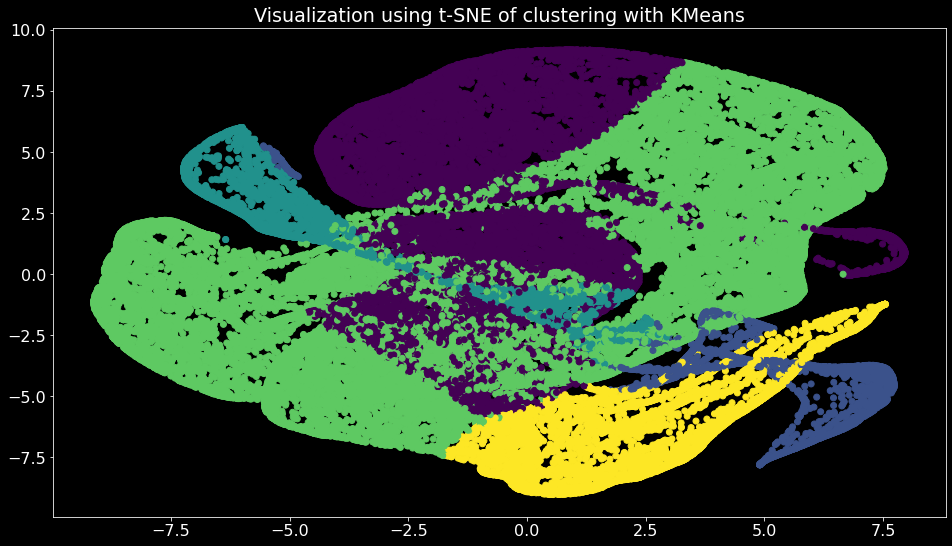

In [31]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c = kmeans_labels)
plt.title('Visualization using t-SNE of clustering with KMeans')
plt.show()

## [4.5 Principal Component Analysis](#4.-Data-preprocessing-&-Feature-Engineering)

In [32]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.488553,0.069530,2.480141,1.677987,2.194568,0.733915,2.002204,0.452774,1.239574,-0.663492,0.395102,-0.410361,-0.429017,-0.600533,0.413654,0.074796,0.073957
1,-1.983049,1.181165,-1.040520,-1.369838,1.208656,0.004654,-0.754435,0.419331,0.341423,-0.186787,-0.275830,1.134759,0.437632,-0.283483,0.100335,-0.579499,-0.224421
2,-0.710856,1.707519,-0.604936,-0.954568,0.631383,-0.820274,-0.094311,-0.569213,0.363051,-0.206192,0.133336,0.404883,0.103026,-0.460603,0.913530,-1.250829,1.207850
3,-0.623450,0.949677,-0.537904,0.124870,1.014729,-0.282670,-0.231907,-0.110885,-0.101450,-1.362614,-0.854032,0.720175,0.950926,1.050692,1.070603,0.462820,0.770658
4,-0.693999,-0.584181,0.178904,1.617875,-0.426898,-0.319570,0.052309,-0.440346,-0.408214,-0.309289,-0.311476,-0.578288,-0.088596,0.723548,0.837556,0.737705,0.514003


In [33]:
X_rus = X_rus.join(X_rus_clust)
X_rus = X_rus.join(X_pca)
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.2, random_state = 69420)
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,...,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
17468,41.15,0,0,0,4.0,3.0,1,0,8,5,...,0.444413,-1.203282,-0.636498,0.197065,-0.708965,-0.818590,-0.146439,1.668275,0.666213,-0.762322
37891,30.68,1,0,1,0.0,0.0,1,1,9,5,...,2.596826,1.871783,0.776208,-0.321286,-1.804573,-0.179696,0.790009,0.384732,-0.231183,-1.634912
13503,29.12,1,0,0,0.0,5.0,0,0,3,5,...,0.051260,0.005817,0.133259,-0.576235,-0.518362,0.605165,1.178593,0.211314,-0.904327,-0.369824
42695,25.68,0,0,1,0.0,0.0,1,1,11,5,...,2.800880,-1.548025,-0.436481,1.173296,-1.205723,-1.732565,-1.089594,0.581901,0.973875,-1.265377
35513,29.05,1,0,0,0.0,0.0,0,0,10,5,...,-0.205522,0.159238,-1.283798,-1.080208,-1.216343,1.745632,0.007703,-0.292145,-0.287945,0.237897


# [5. Model selection](#Table-of-contents)

* <a href = '#5.1-Logistic-Regression'>5.1 Logistic Regression</a>
* <a href = '#5.2-Discriminant-analysises'>5.2 Discriminant analysises</a>
* <a href = '#5.3-KNN'>5.3 KNN</a>
* <a href = '#5.4-Ensembles'>5.4 Ensembles</a>
* <a href = '#5.5-Models-comparison'>5.5 Models comparison</a>

In [34]:
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

warnings.filterwarnings('ignore')

In [35]:
# construct confusion matrix using pandas dataframe and scikit learn confusion matrix method
def conf_matrix(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    conf_mat_df = pd.DataFrame(data = {'Predicted Positive': [tp, fp], 'Predicted Negative': [fn, tn]}, index = ['Real Positive', 'Real Negative'])
    return conf_mat_df

# a function that calculates and outputs evaluation values
def model_stats(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    all_values = tn+fp+fn+tp
    true_pos_rate = tp/all_values
    false_neg_rate = fn/all_values
    false_pos_rate = fp/all_values
    true_neg_rate = tn/all_values
    prior_error_rate = (tp + fn)/all_values
    error_rate = (fn+fp)/all_values
    pos_pred_value = tp/(tp+fp)
    neg_pred_value = tn/(tn+fn)
    return pd.Series({'prior_error_rate': prior_error_rate,
                      'total_error_rate': error_rate,
                      'true_positive_rate (sensitivity)': true_pos_rate,
                      'false_negative_rate': false_neg_rate,
                      'false_positive_rate': false_pos_rate,
                      'true_negative_rate (specificity)': true_neg_rate,
                      'positive_predictive_value (precision)': pos_pred_value,
                      'negative_predictive_value': neg_pred_value})

def model_accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy*100

def positiveObserv(y_test):
    a = y_test.value_counts()[1]/(y_test.value_counts()[0] + y_test.value_counts()[1]) * 100
    print(str(round(a, 2)) + '% of observations are positive')

## [5.1 Logistic Regression](#5.-Model-selection)

In [36]:
logit_mod = LogisticRegression().fit(X_train, y_train)
y_pred_logit = logit_mod.predict(X_test)

print('='*55)
logit_accur = round(model_accuracy(y_test, y_pred_logit), 2)
print(f'Model accuracy is {logit_accur}%')
logit_eval = model_stats(y_test, y_pred_logit)
display(conf_matrix(y_test, y_pred_logit))

logit_eval

Model accuracy is 75.47%


,Predicted Positive,Predicted Negative
Real Positive,4183,1242
Real Negative,1444,4081


prior_error_rate                         0.495434
total_error_rate                         0.245297
true_positive_rate (sensitivity)         0.382009
false_negative_rate                      0.113425
false_positive_rate                      0.131872
true_negative_rate (specificity)         0.372694
positive_predictive_value (precision)    0.743380
negative_predictive_value                0.766673
dtype: float64

## [5.2 Discriminant analysises](#5.-Model-selection)

### LDA

In [37]:
lda = LinearDiscriminantAnalysis()


lda_mod = lda.fit(X_train, y_train)
y_pred_lda = lda_mod.predict(X_test)

positiveObserv(y_test)
print('-' * 55)
lda_accur = model_accuracy(y_test, y_pred_lda)
print('Model accuracy is ' + str(round(lda_accur, 2)) + '%')
print('-' * 55)
display(conf_matrix(y_test, y_pred_lda))
print('-' * 55)
lda_eval = model_stats(y_test,y_pred_lda)
print(lda_eval)

49.54% of observations are positive
-------------------------------------------------------
Model accuracy is 75.42%
-------------------------------------------------------


,Predicted Positive,Predicted Negative
Real Positive,4262,1163
Real Negative,1529,3996


-------------------------------------------------------
prior_error_rate                         0.495434
total_error_rate                         0.245845
true_positive_rate (sensitivity)         0.389224
false_negative_rate                      0.106210
false_positive_rate                      0.139635
true_negative_rate (specificity)         0.364932
positive_predictive_value (precision)    0.735970
negative_predictive_value                0.774569
dtype: float64


### QDA

In [38]:
qda = QuadraticDiscriminantAnalysis()
params_qda = {
            'reg_param': [i/10 for i in range(1, 10, 1)],
            'store_covariance' : [True, False]
        }

qda_mod = GridSearchCV(qda, params_qda, cv=10).fit(X_train, y_train)
y_pred_qda = qda_mod.predict(X_test)

positiveObserv(y_test)
print('-' * 55)
qda_accur = model_accuracy(y_test, y_pred_qda)
print('Model accuracy is ' + str(round(qda_accur, 2)) + '%')
print('-' * 55)
display(conf_matrix(y_test, y_pred_qda))
print('-' * 55)
qda_eval = model_stats(y_test,y_pred_qda)
print(qda_eval)

49.54% of observations are positive
-------------------------------------------------------
Model accuracy is 74.79%
-------------------------------------------------------


,Predicted Positive,Predicted Negative
Real Positive,4179,1246
Real Negative,1515,4010


-------------------------------------------------------
prior_error_rate                         0.495434
total_error_rate                         0.252146
true_positive_rate (sensitivity)         0.381644
false_negative_rate                      0.113790
false_positive_rate                      0.138356
true_negative_rate (specificity)         0.366210
positive_predictive_value (precision)    0.733930
negative_predictive_value                0.762938
dtype: float64


## [5.3 KNN](#5.-Model-selection)

In [39]:
k_nums = range(50, 60)
knn_compare = {}
knn_scores = {}
for k in k_nums:
    knn_mod = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_knn = knn_mod.predict(X_test)
    print('='*55)
    knn_accur = model_accuracy(y_test, y_pred_knn)
    print(f'Model accuracy for {k}-neighbor(s) is {str(round(knn_accur, 2))}%')
    knn_eval = model_stats(y_test, y_pred_knn)
    knn_scores[f'{k} neighbor'] = round(knn_accur, 2)
    knn_compare[f'{k} neighbor'] = knn_eval

Model accuracy for 50-neighbor(s) is 75.47%
Model accuracy for 51-neighbor(s) is 75.57%
Model accuracy for 52-neighbor(s) is 75.33%
Model accuracy for 53-neighbor(s) is 75.42%
Model accuracy for 54-neighbor(s) is 75.33%
Model accuracy for 55-neighbor(s) is 75.33%
Model accuracy for 56-neighbor(s) is 75.27%
Model accuracy for 57-neighbor(s) is 75.26%
Model accuracy for 58-neighbor(s) is 75.3%
Model accuracy for 59-neighbor(s) is 75.14%


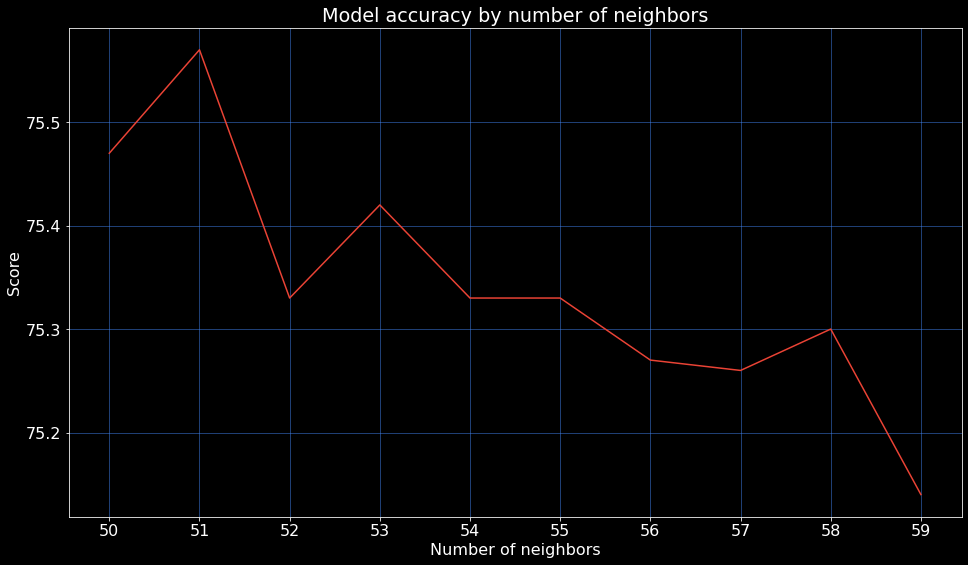

In [40]:
x_scores = [i for i,v in enumerate(knn_scores)]
y_scores = [knn_scores[v] for i,v in enumerate(knn_scores)]
x_labels = [str(v[:2]) for i, v in enumerate(knn_scores)]
plt.plot(x_scores, y_scores, red)
plt.xticks(x_scores, x_labels)
plt.ylabel('Score')
plt.grid(alpha = 0.6, color = blue)
plt.xlabel('Number of neighbors')
plt.title('Model accuracy by number of neighbors')
plt.show()

In [41]:
pd.DataFrame(knn_compare).T.sort_values('positive_predictive_value (precision)', ascending = False)

,prior_error_rate,total_error_rate,true_positive_rate (sensitivity),false_negative_rate,false_positive_rate,true_negative_rate (specificity),positive_predictive_value (precision),negative_predictive_value
50 neighbor,0.495434,0.245297,0.391781,0.103653,0.141644,0.362922,0.734463,0.777843
52 neighbor,0.495434,0.246667,0.391324,0.104110,0.142557,0.362009,0.732980,0.776646
54 neighbor,0.495434,0.246667,0.391781,0.103653,0.143014,0.361553,0.732582,0.777189
56 neighbor,0.495434,0.247306,0.391689,0.103744,0.143562,0.361005,0.731786,0.776773
51 neighbor,0.495434,0.244292,0.397169,0.098265,0.146027,0.358539,0.731170,0.784886
58 neighbor,0.495434,0.247032,0.392968,0.102466,0.144566,0.360000,0.731057,0.778436
53 neighbor,0.495434,0.245753,0.396804,0.098630,0.147123,0.357443,0.729516,0.783740
55 neighbor,0.495434,0.246667,0.396621,0.098813,0.147854,0.356712,0.728447,0.783079
57 neighbor,0.495434,0.247397,0.396895,0.098539,0.148858,0.355708,0.727242,0.783072
59 neighbor,0.495434,0.248584,0.396804,0.098630,0.149954,0.354612,0.725739,0.782390


From the data and chart above we can see that k=51 performs better when it comes to precision and accuracy, so we will use it further

In [49]:
knn_mod = KNeighborsClassifier(n_neighbors=51).fit(X_train, y_train)
y_pred_knn = knn_mod.predict(X_test)
print('='*55)
knn_accur = model_accuracy(y_test, y_pred_knn)
print(f'Model accuracy for KNN is {str(round(knn_accur, 2))}%')
knn_eval = model_stats(y_test, y_pred_knn)
display(conf_matrix(y_test, y_pred_knn))
knn_eval

Model accuracy for KNN is 75.57%


,Predicted Positive,Predicted Negative
Real Positive,4349,1076
Real Negative,1599,3926


prior_error_rate                         0.495434
total_error_rate                         0.244292
true_positive_rate (sensitivity)         0.397169
false_negative_rate                      0.098265
false_positive_rate                      0.146027
true_negative_rate (specificity)         0.358539
positive_predictive_value (precision)    0.731170
negative_predictive_value                0.784886
dtype: float64

## [5.4 Ensembles](#5.-Model-selection)

### Random Forest

In [43]:
rand_for_mod = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
y_pred_randf = rand_for_mod.predict(X_test)

print('='*55)
rand_for_accur = round(model_accuracy(y_test, y_pred_randf), 2)
print(f'Model accuracy is {rand_for_accur}%')
randf_eval = model_stats(y_test, y_pred_randf)
display(conf_matrix(y_test, y_pred_randf))

randf_eval

Model accuracy is 76.05%


,Predicted Positive,Predicted Negative
Real Positive,4355,1070
Real Negative,1552,3973


prior_error_rate                         0.495434
total_error_rate                         0.239452
true_positive_rate (sensitivity)         0.397717
false_negative_rate                      0.097717
false_positive_rate                      0.141735
true_negative_rate (specificity)         0.362831
positive_predictive_value (precision)    0.737261
negative_predictive_value                0.787825
dtype: float64

### Ada Boost

In [44]:
ada_mod = AdaBoostClassifier().fit(X_train, y_train)
y_pred_ada = ada_mod.predict(X_test)

print('='*55)
ada_accur = round(model_accuracy(y_test, y_pred_ada), 2)
print(f'Model accuracy is {ada_accur}%')
ada_eval = model_stats(y_test, y_pred_ada)
display(conf_matrix(y_test, y_pred_ada))

ada_eval

Model accuracy is 76.28%


,Predicted Positive,Predicted Negative
Real Positive,4300,1125
Real Negative,1472,4053


prior_error_rate                         0.495434
total_error_rate                         0.237169
true_positive_rate (sensitivity)         0.392694
false_negative_rate                      0.102740
false_positive_rate                      0.134429
true_negative_rate (specificity)         0.370137
positive_predictive_value (precision)    0.744976
negative_predictive_value                0.782735
dtype: float64

### Gradient Boosting

In [45]:
grad_mod = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_grad = grad_mod.predict(X_test)

print('='*55)
grad_accur = round(model_accuracy(y_test, y_pred_grad), 2)
print(f'Model accuracy is {grad_accur}%')
grad_eval = model_stats(y_test, y_pred_grad)
display(conf_matrix(y_test, y_pred_grad))

grad_eval

Model accuracy is 77.01%


,Predicted Positive,Predicted Negative
Real Positive,4435,990
Real Negative,1527,3998


prior_error_rate                         0.495434
total_error_rate                         0.229863
true_positive_rate (sensitivity)         0.405023
false_negative_rate                      0.090411
false_positive_rate                      0.139452
true_negative_rate (specificity)         0.365114
positive_predictive_value (precision)    0.743878
negative_predictive_value                0.801524
dtype: float64

## [5.5 Models comparison](#5.-Model-selection)

In [46]:
evals = pd.DataFrame({'Logistic Regression': logit_eval,
                    'LDA'  : lda_eval,
                    'QDA'  : qda_eval,
                    'KNN'  : knn_eval,
                     'Random Forest': randf_eval,
                     'Ada Boost': ada_eval,
                     'Gradient Boost': grad_eval}).T
evals

,prior_error_rate,total_error_rate,true_positive_rate (sensitivity),false_negative_rate,false_positive_rate,true_negative_rate (specificity),positive_predictive_value (precision),negative_predictive_value
Logistic Regression,0.495434,0.245297,0.382009,0.113425,0.131872,0.372694,0.743380,0.766673
LDA,0.495434,0.245845,0.389224,0.106210,0.139635,0.364932,0.735970,0.774569
QDA,0.495434,0.252146,0.381644,0.113790,0.138356,0.366210,0.733930,0.762938
KNN,0.495434,0.246667,0.391781,0.103653,0.143014,0.361553,0.732582,0.777189
Random Forest,0.495434,0.239452,0.397717,0.097717,0.141735,0.362831,0.737261,0.787825
Ada Boost,0.495434,0.237169,0.392694,0.102740,0.134429,0.370137,0.744976,0.782735
Gradient Boost,0.495434,0.229863,0.405023,0.090411,0.139452,0.365114,0.743878,0.801524


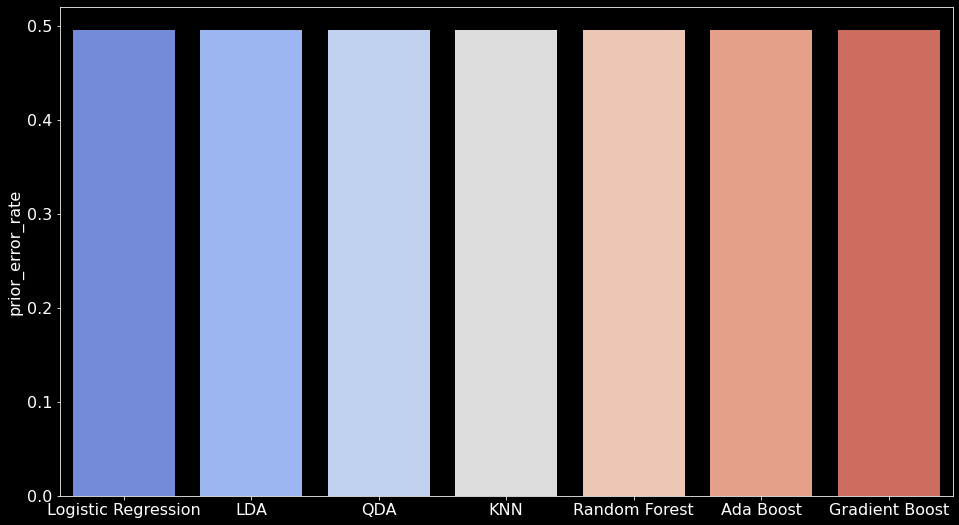

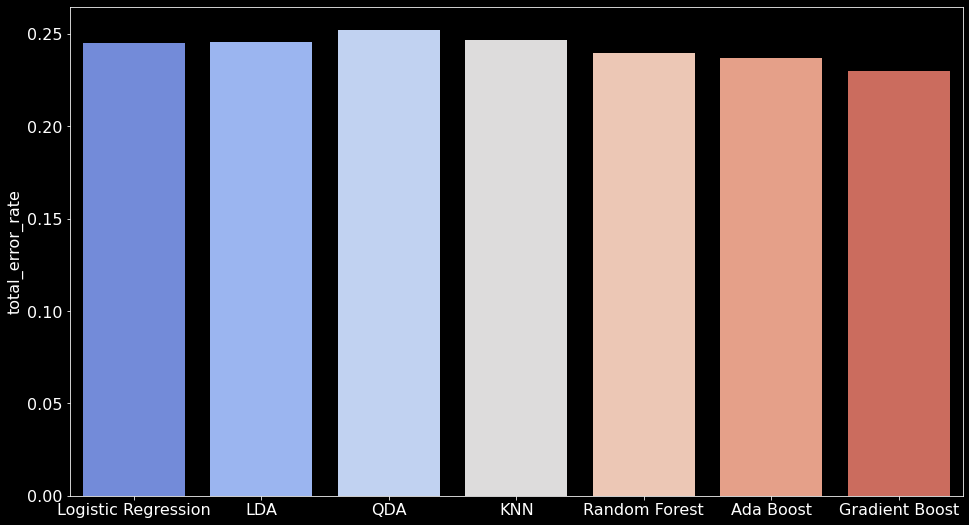

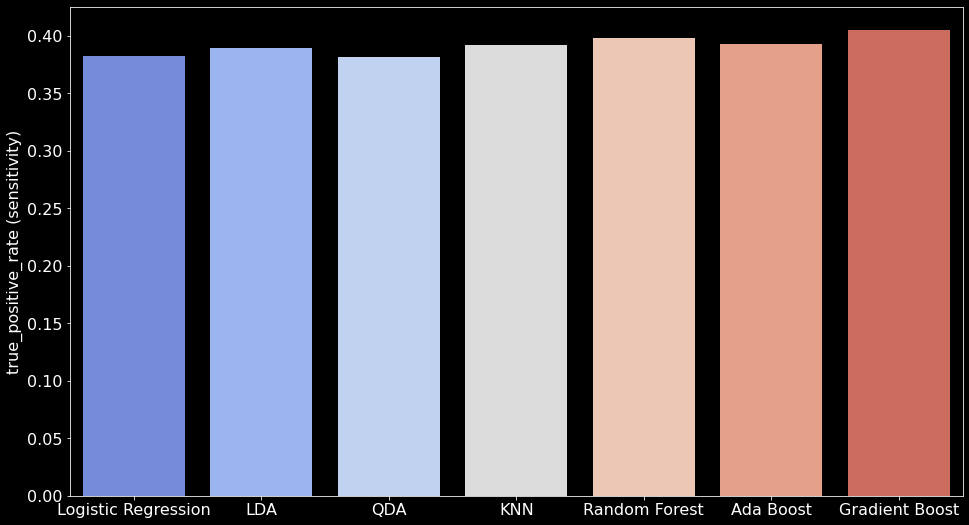

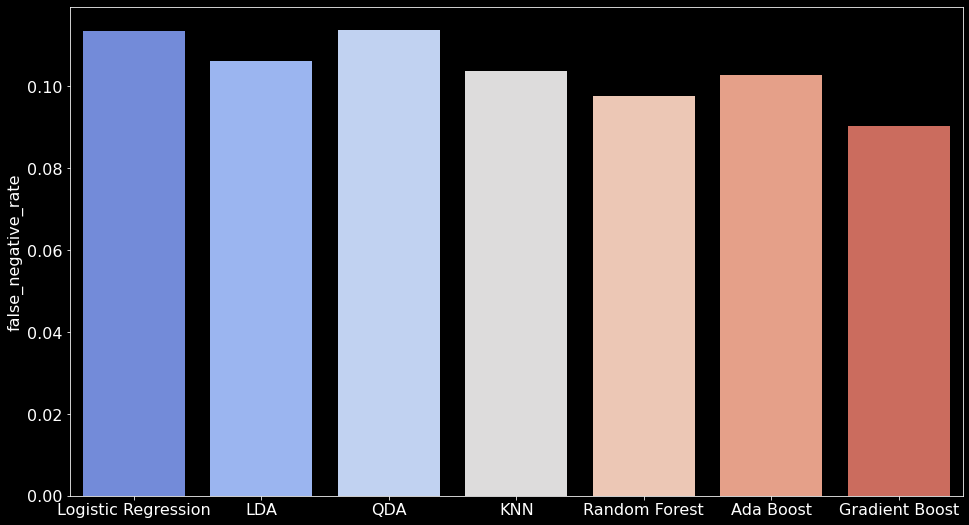

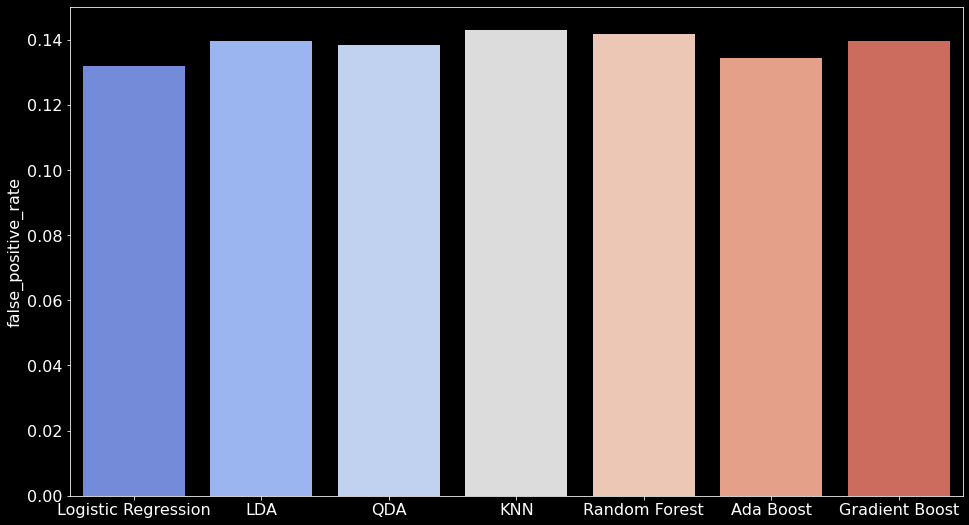

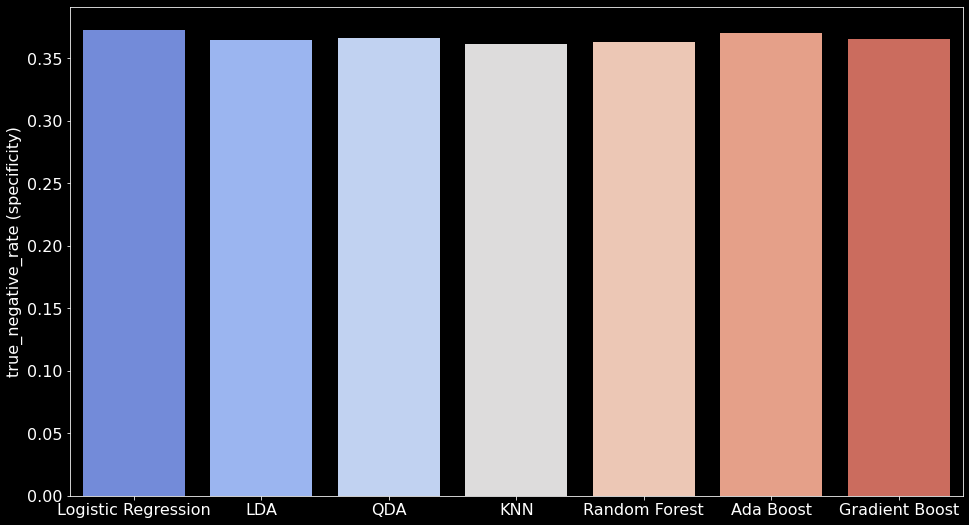

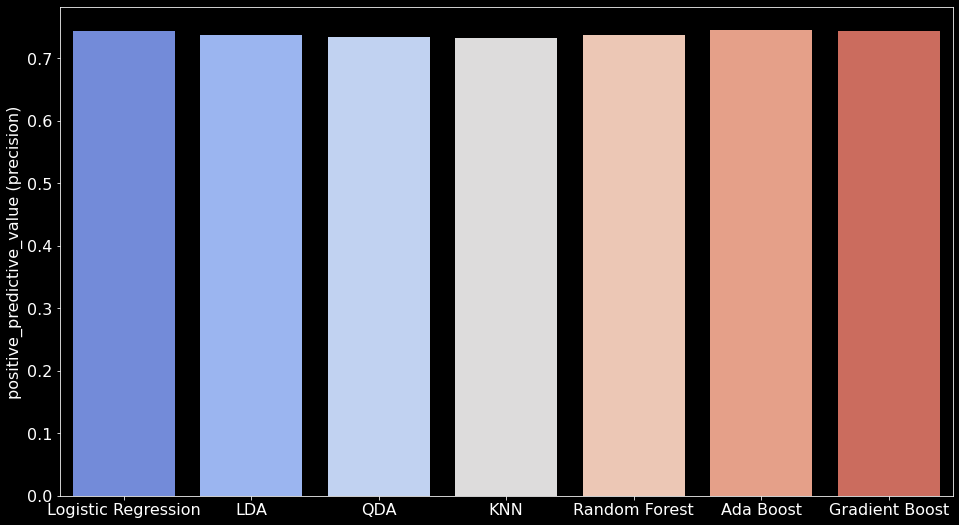

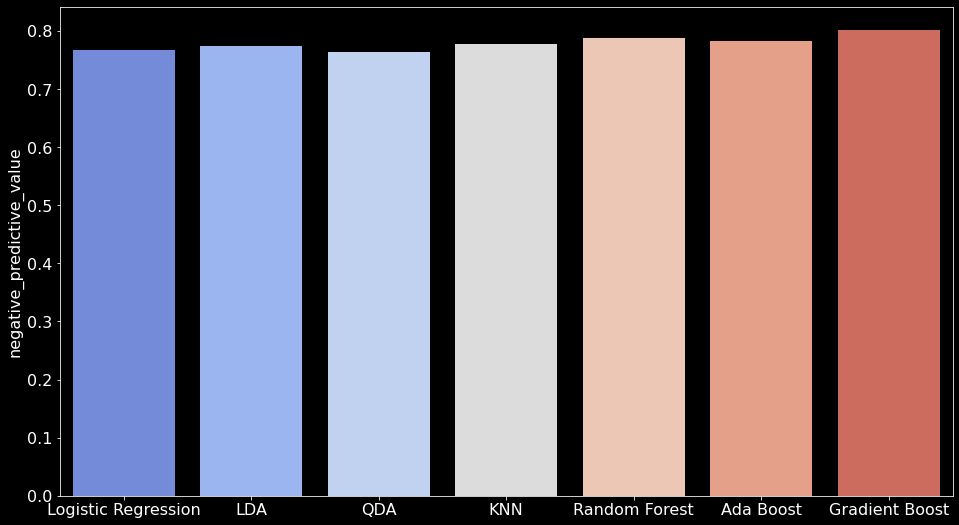

In [47]:
for i in evals.columns:
    sns.barplot(x = evals.index, y = evals[i], palette = 'coolwarm');
    plt.show()

So we will be choosing gradient boosting as our main model

# [6. Model evaluation](#Table-of-contents)

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report


print(classification_report(y_pred_grad, y_test))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      5006
           1       0.81      0.75      0.78      5944

    accuracy                           0.77     10950
   macro avg       0.76      0.77      0.76     10950
weighted avg       0.77      0.77      0.77     10950



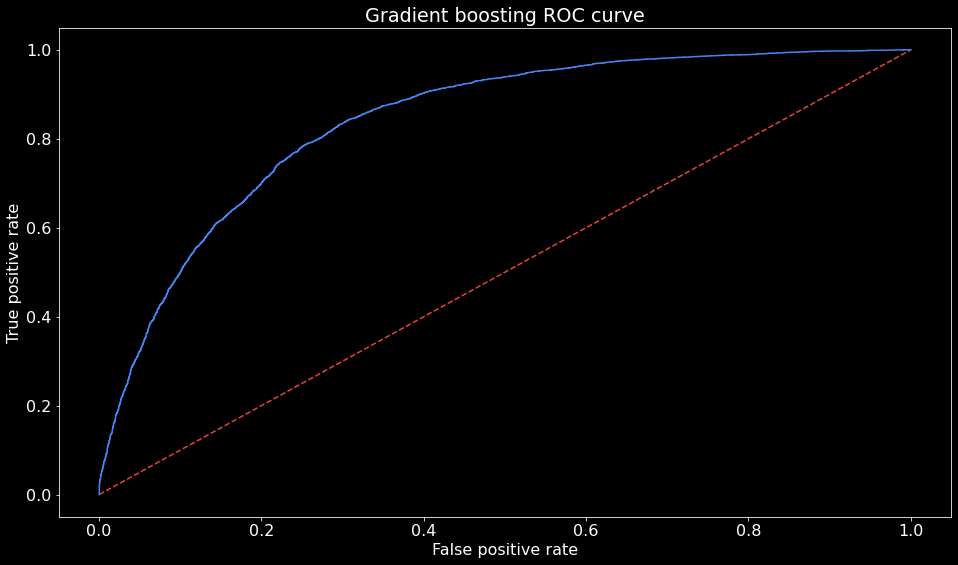

In [77]:
y_pred_proba = grad_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'--', color = red)
plt.plot(fpr, tpr, color = blue)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Gradient boosting ROC curve') 
plt.show()

In [81]:
conf_matrix(y_test, y_pred_grad)

,Predicted Positive,Predicted Negative
Real Positive,4438,1067
Real Negative,1506,3939


In [84]:
import csv
with open('predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in y_pred_grad:
        writer.writerow([i])